<a href="https://colab.research.google.com/github/AJAkil/twitter-sentiment-analysis/blob/master/Tweet_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This is a simple sentiment analzer for tweeter data

In [ ]:
# importing the necessary librarires
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import string
plt.style.use('fivethirtyeight')

In [47]:
# loading up the credentials
login_creds = pd.read_csv('/content/logs.csv')



'UHcBrsbgwoQrfccHP2fG6Qz5A'

In [49]:
authenticate = tweepy.OAuthHandler(login_creds['key'][0],login_creds['key'][1])

# Set the access token for the tweets
authenticate.set_access_token(login_creds['key'][2], login_creds['key'][3])

In [50]:
# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [51]:
# Extract 100 tweets from the tweeter user
posts = api.user_timeline(screen_name='BillGates',count=100, lang='eng',tweet_mode='extended')

# Print the last 5 tweets from the account
print('Show the 5 recent tweets: \n')
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i += 1

Show the 5 recent tweets: 

1)Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year. @BernardOlayo founded @Hewa_Tele to address this often-overlooked challenge. https://t.co/TSea0oyDjP

2)This hero is playing a critical role in Kenya’s preparations to tackle COVID-19 by scaling up medical oxygen supplies that will be needed to keep the most critically ill patients alive. https://t.co/U2YcRgzSDA

3)RT @MichelleObama: Here's what #Juneteenth means to me: https://t.co/KlOoYwdzD5

4)RT @NavigatingNikki: “It’s that clarity of language about the VALUE of black life in America that distinguishes #Juneteenth as emancipation…

5)RT @nationalbook: "And I’ll never lose my faith that you and I can create an anti-racist America where racial disparities are nonexistent.…



In [52]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [53]:
df.head()

,Tweets
0,"Globally, a lack of medical oxygen–needed to t..."
1,This hero is playing a critical role in Kenya’...
2,RT @MichelleObama: Here's what #Juneteenth mea...
3,RT @NavigatingNikki: “It’s that clarity of lan...
4,"RT @nationalbook: ""And I’ll never lose my fait..."


In [54]:
# Clean the tweets

def clean_tweets(tweet):
  tweet = re.sub(r'@[A-Za-z0-9]+\:', '', tweet) # Removed @mentions
  tweet = re.sub(r'#', '', tweet) # Removing any hashtags
  tweet = re.sub(r'RT[\s]', '', tweet) # Removing any retweets along with  whitespace
  tweet = re.sub(r'https?:\/\/\S+', '', tweet) # Removing any hyperlink from the text

  tweet = "".join([char for char in tweet if char not in string.punctuation]) # Removing any punctuation
  tweet = re.sub(r'[0-9]+','', tweet) # Removing any numbers from the tweet

  return tweet

# Cleaning the tweets
df['Tweets'] = df['Tweets'].apply(clean_tweets)

df

,Tweets
0,Globally a lack of medical oxygen–needed to tr...
1,This hero is playing a critical role in Kenya’...
2,Heres what Juneteenth means to me
3,“It’s that clarity of language about the VALU...
4,And I’ll never lose my faith that you and I c...
...,...
94,These global health heroes have helped Banglad...
95,It’s encouraging to see these results Typhoid ...
96,Thanks to the work of this father–daughter dyn...
97,Solving the world’s toughest challenges—like f...


In [55]:
# Create a function to get the subjectivity
def get_subjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity

# Create a function to get the polarity
def get_polarity(tweet):
  return TextBlob(tweet).sentiment.polarity


# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

df

,Tweets,Subjectivity,Polarity
0,Globally a lack of medical oxygen–needed to tr...,0.125000,-0.041667
1,This hero is playing a critical role in Kenya’...,0.540000,0.020000
2,Heres what Juneteenth means to me,0.000000,0.000000
3,“It’s that clarity of language about the VALU...,0.433333,-0.166667
4,And I’ll never lose my faith that you and I c...,0.000000,0.000000
...,...,...,...
94,These global health heroes have helped Banglad...,0.187500,-0.062500
95,It’s encouraging to see these results Typhoid ...,0.733333,-0.100000
96,Thanks to the work of this father–daughter dyn...,0.247917,0.175000
97,Solving the world’s toughest challenges—like f...,0.809091,0.206061


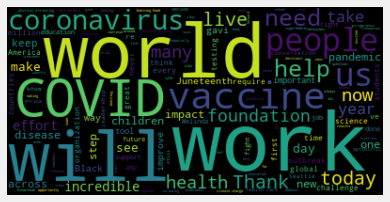

In [63]:
from wordcloud import WordCloud

# Plot the word clouds
all_words = ''.join([tweets for tweets in df['Tweets']])
wordcloud = WordCloud().generate(all_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()